In [1]:
import numpy as np
import pandas as pd

In [72]:
import random

In [3]:
import pickle

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
matplotlib.rcParams.update({'font.size':14})

In [12]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t"+str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t"+str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(121)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    
    plt.show()

# Data downloading

In [18]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Data is successfully loaded')

Data is successfully loaded


In [20]:
print(f"Train:\t{train.shape[0]}\t sales and {train.shape[1]} features")
print(f"Test:\t{test.shape[0]}\t sales and {test.shape[1]} features")


Train:	10000	 sales and 20 features
Test:	5000	 sales and 19 features


In [21]:
train.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [23]:
test.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [25]:
print('Строк в train:', train.shape[0])
print('Строк в test:', test.shape[0])

Строк в train: 10000
Строк в test: 5000


In [27]:
train.shape[1] - 1 == test.shape[1]

True

# Целевая переменная

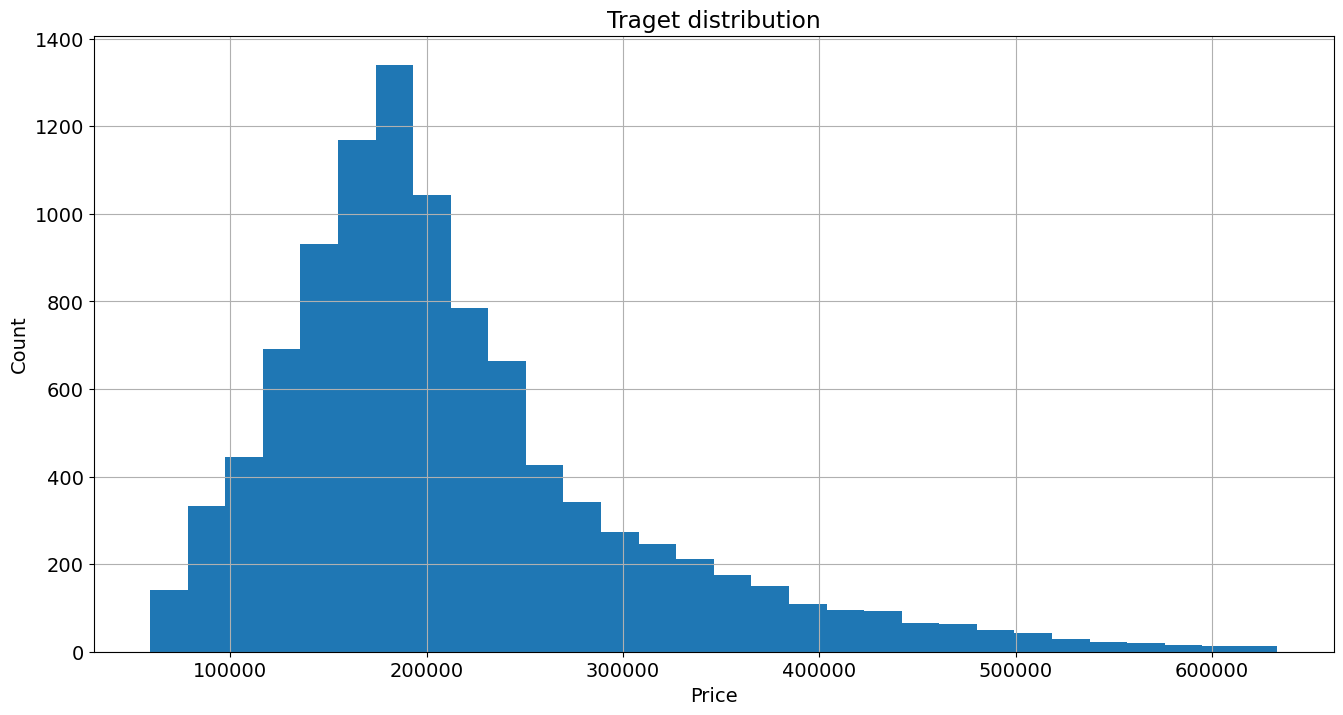

In [29]:
plt.figure(figsize = (16,8))

train['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Traget distribution')
plt.show()

### Количественные переменные

In [30]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'DistrictId'}>,
        <AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>],
       [<AxesSubplot:title={'center':'LifeSquare'}>,
        <AxesSubplot:title={'center':'KitchenSquare'}>,
        <AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>],
       [<AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>,
        <AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>],
       [<AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>,
        <AxesSubplot:title={'center':'Helthcare_2'}>,
        <AxesSubplot:title={'center':'Shops_1'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

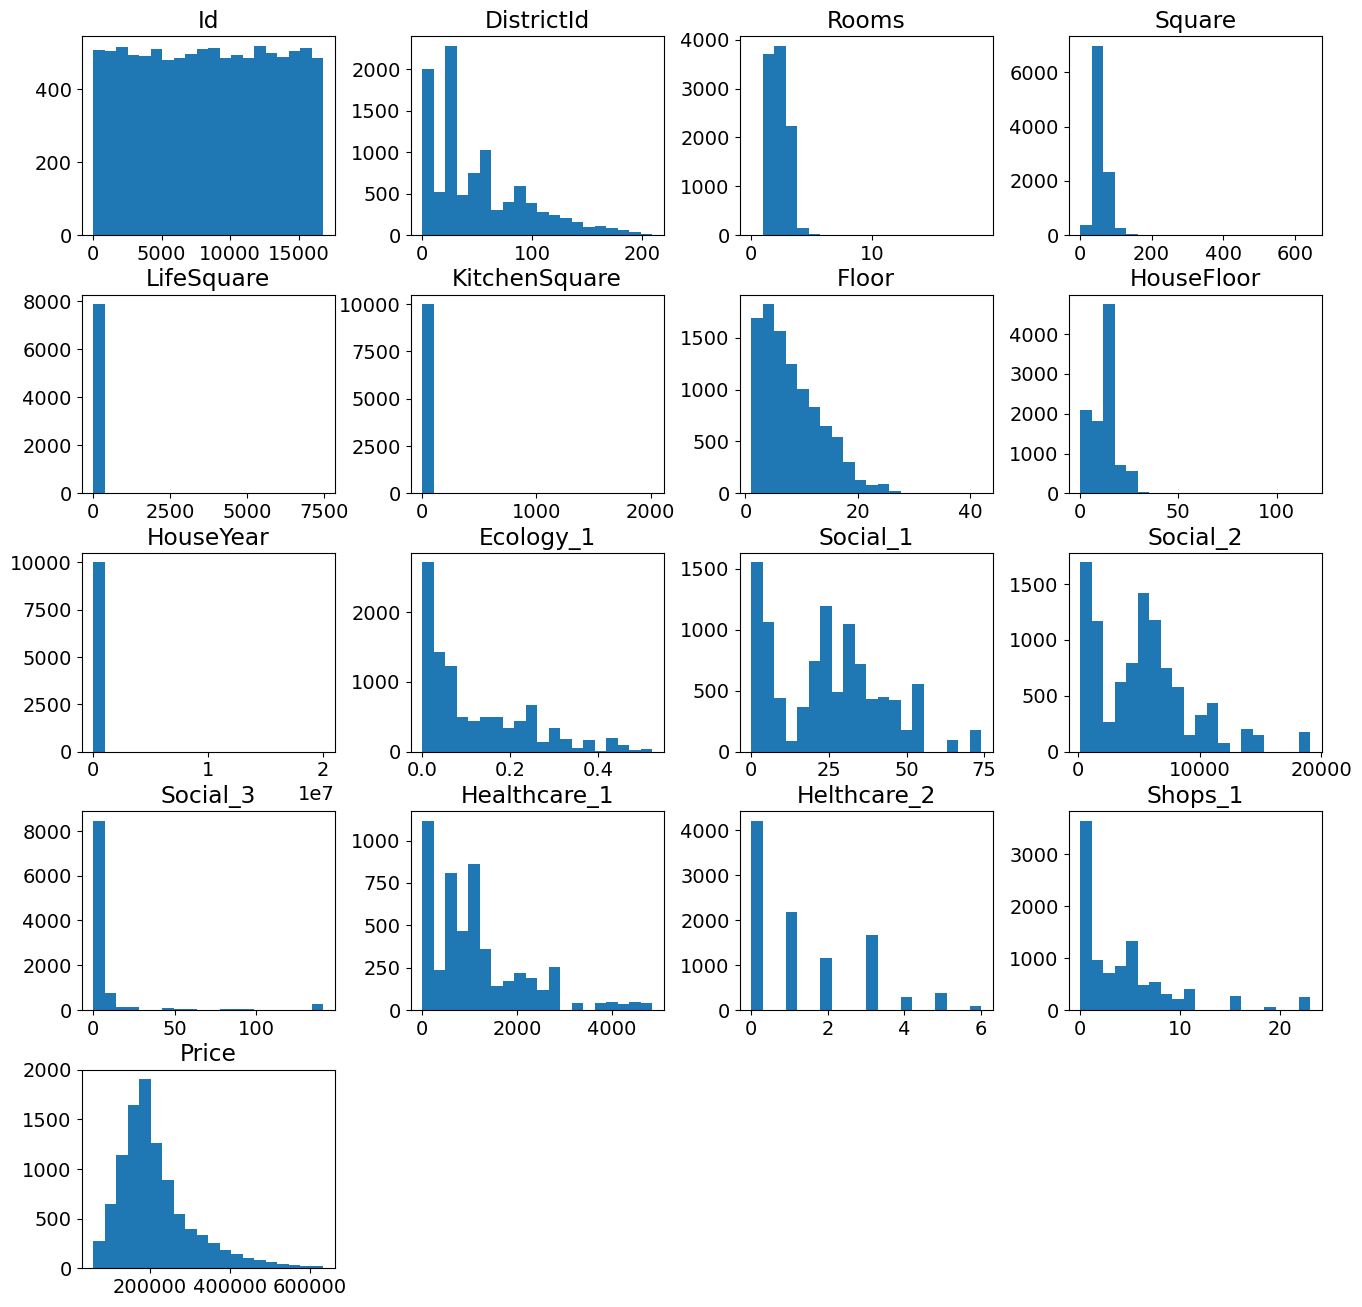

In [31]:
train.hist(figsize=(16,16), bins=20, grid=False)

### Номинативные переменные

In [32]:
train.select_dtypes(include='object').columns.tolist()

['Ecology_2', 'Ecology_3', 'Shops_2']

In [35]:
train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [36]:
train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [37]:
train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

## Обработка выбросов

### Rooms

In [40]:
train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [42]:
train['Rooms_outlier'] = 0
train.loc[(train['Rooms'] == 0) | (train['Rooms'] >=6), 'Rooms_outlier'] = 1
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,B,33,7976,5,NaN,0,11,B,184966.930730,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,B,46,10309,1,240.0,1,16,B,300009.450063,0
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,B,34,7759,0,229.0,1,3,B,220925.908524,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,B,23,5735,3,1084.0,0,5,B,175616.227217,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,B,35,5776,1,2078.0,2,4,B,150226.531644,0


In [43]:
train['Rooms_outlier'].value_counts()

0    9988
1      12
Name: Rooms_outlier, dtype: int64

In [44]:
train.loc[train['Rooms'] == 0, 'Rooms'] = 1
train.loc[train['Rooms'] >=6, 'Rooms'] = train['Rooms'].median()


In [46]:
train['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

### KitchenSquare

In [47]:
train['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
32.0         2
41.0         2
51.0         2
30.0         2
112.0        2
37.0         2
43.0         2
25.0         2
58.0         2
84.0         1
75.0         1
21.0         1
54.0         1
62.0         1
40.0         1
29.0         1
1970.0       1
27.0         1
39.0         1
35.0         1
23.0         1
73.0         1
31.0         1
60.0         1
63.0         1
42.0         1
36.0         1
96.0         1
26.0         1
53.0         1
78.0         1
66.0         1
2014.0       1
48.0         1
72.0         1
123.0        1
Name: KitchenSquare, dtype: int64

<AxesSubplot:xlabel='KitchenSquare'>

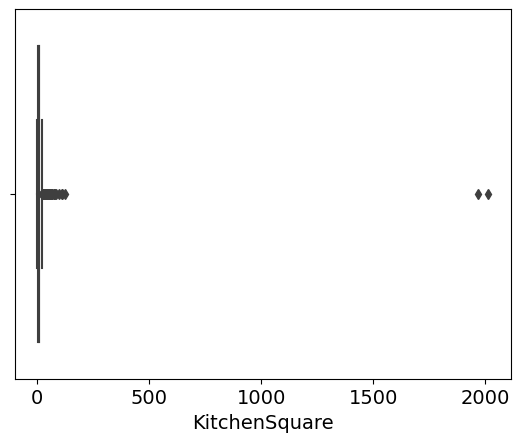

In [48]:
sns.boxplot(train.KitchenSquare)

In [49]:
train['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [52]:
train['KitchenSquare'].quantile(.975), train['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [53]:
condition = (train['KitchenSquare'].isna()) | (train['KitchenSquare'] > train['KitchenSquare'].quantile(.975))

train.loc[condition, 'KitchenSquare'] = train['KitchenSquare'].median()
train.loc[train['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [54]:
train['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

### HouseFloor, Floor

In [56]:
train['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [57]:
train['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [58]:
(train['Floor'] > train['HouseFloor']).sum()

1825

In [59]:
train['HouseFloor'] = 0
train.loc[train['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
train.loc[train['Floor'] > train['HouseFloor'], 'HouseFloor_outlier'] = 1

In [61]:
train.loc[train['HouseFloor'] == 0, 'HouseFloor'] = train['HouseFloor'].median()

In [63]:
floor_out = train.loc[train['Floor'] > train['HouseFloor']].index

In [64]:
floor_out

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
           dtype='int64', length=10000)

In [73]:
train.loc[floor_out, 'Floor'] = train.loc[floor_out, 'HouseFloor'].apply(lambda x: random.randint(1,x))

ValueError: empty range for randrange() (1, 1, 0)

## HouseYear

In [74]:
train['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
5701        2020
2493        2020
1499        2020
          ...   
7611        1916
910         1914
2656        1912
5111        1912
9317        1910
Name: HouseYear, Length: 10000, dtype: int64

# Обработка пропусков

In [76]:
train.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
dtype: int64

In [77]:
train[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,47.981561,29.442751,6.0
1,65.683640,40.049543,8.0
2,44.947953,29.197612,3.0
3,53.352981,52.731512,9.0
4,39.649192,23.776169,7.0
5,80.384479,46.683720,12.0
6,62.254114,37.160377,7.0
7,80.312926,NaN,3.0
8,64.511437,NaN,3.0
9,46.461409,18.915552,8.0


### LifeSquare

In [139]:
train['LifeSquare_non'] = train['LifeSquare'].isna() * 1

condition = (train['LifeSquare'].isna()) \
             & (~train['Square'].isna()) \
             & (~train['KitchenSquare'].isna())
        
train.loc[condition, 'LifeSquare'] = train.loc[condition, 'Square'] \
                                            - train.loc[condition, 'KitchenSquare'] - 3

### HealthCare_1

In [140]:
train.drop('Healthcare_1', axis=1, inplace=True)

In [141]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1
        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3
        
        
        X.fillna(self.medians, inplace=True)
        
        return X

## Построение новых признаков
        

## Dummies

In [142]:
binary_to_number = {'A':0, 'B':1}

train['Shops_2'] = train['Shops_2'].replace(binary_to_number)
train['Ecology_2'] = train['Ecology_2'].replace(binary_to_number)
train['Ecology_3'] = train['Ecology_3'].replace(binary_to_number)

In [143]:
district_size = train['DistrictId'].value_counts().reset_index().rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [144]:
train = train.merge(district_size, on='DistrictId', how='left')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_non,DistrictSize
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,1,33,7976,5,0,11,1,184966.930730,0,22
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,46,10309,1,1,16,1,300009.450063,0,87
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,1,34,7759,0,1,3,1,220925.908524,0,174
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,1,23,5735,3,0,5,1,175616.227217,0,179
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,35,5776,1,2,4,1,150226.531644,0,97


In [145]:
(train['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [146]:
train['isDistrictLarge'] = (train['DistrictSize'] > 100).astype(int)

## MEDPriceByDistrict

In [95]:
med_price_by_district = train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByDistrict'})
med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202666.310126


In [96]:
train = train.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_non,DistrictSize,isDistrictLarge,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7,0,1969,0.089040,...,0,11,1,184966.930730,0,1.0,0,22,0,207786.135836
1,15053,41,3.0,65.683640,40.049543,8.0,7,0,1978,0.000070,...,1,16,1,300009.450063,0,1.0,0,87,0,300009.450063
2,4765,53,2.0,44.947953,29.197612,3.0,8,0,1968,0.049637,...,1,3,1,220925.908524,0,1.0,0,174,1,263206.223152
3,5809,58,2.0,53.352981,52.731512,9.0,8,0,1977,0.437885,...,0,5,1,175616.227217,0,1.0,0,179,1,166809.665642
4,10783,99,1.0,39.649192,23.776169,7.0,11,0,1976,0.012339,...,2,4,1,150226.531644,0,1.0,0,97,0,158539.052715


In [112]:
def floor_to_cat(X):
    bins = [0,3,5,9,15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    X['floor_cat'].fillna(-1, inplace=True)
    return X

def year_to_cat(X):
    bins = [0, 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [113]:
bins = [0,3,5,9,15, train['Floor'].max()]
pd.cut(train['Floor'], bins=bins)

0        (5, 9]
1        (5, 9]
2        (5, 9]
3        (5, 9]
4       (9, 15]
         ...   
9995     (5, 9]
9996    (9, 15]
9997    (9, 15]
9998     (0, 3]
9999     (5, 9]
Name: Floor, Length: 10000, dtype: category
Categories (5, interval[int64, right]): [(0, 3] < (3, 5] < (5, 9] < (9, 15] < (15, 42]]

In [114]:
bins = [0, 1941, 1945, 1980, 2000, 2010, train['HouseYear'].max()]
pd.cut(train['HouseYear'], bins=bins, labels=False)

0       2
1       2
2       2
3       2
4       2
       ..
9995    2
9996    3
9997    5
9998    2
9999    3
Name: HouseYear, Length: 10000, dtype: int64

In [115]:
train = year_to_cat(train)
train = floor_to_cat(train)
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_2,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_non,DistrictSize,isDistrictLarge,MedPriceByDistrict,year_cat,floor_cat
0,14038,35,2.0,47.981561,29.442751,6.0,7,0,1969,0.089040,...,1,184966.930730,0,1.0,0,22,0,207786.135836,2,2
1,15053,41,3.0,65.683640,40.049543,8.0,7,0,1978,0.000070,...,1,300009.450063,0,1.0,0,87,0,300009.450063,2,2
2,4765,53,2.0,44.947953,29.197612,3.0,8,0,1968,0.049637,...,1,220925.908524,0,1.0,0,174,1,263206.223152,2,2
3,5809,58,2.0,53.352981,52.731512,9.0,8,0,1977,0.437885,...,1,175616.227217,0,1.0,0,179,1,166809.665642,2,2
4,10783,99,1.0,39.649192,23.776169,7.0,11,0,1976,0.012339,...,1,150226.531644,0,1.0,0,97,0,158539.052715,2,3


In [117]:
med_price_by_floor_year = train.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

,year_cat,floor_cat,MedPriceByFloorYear
0,0,0,380359.112959
1,0,1,321497.418777
2,0,2,368718.236013
3,0,3,400715.465642
4,1,0,467230.539057


In [118]:
train = train.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Price,Rooms_outlier,HouseFloor_outlier,LifeSquare_non,DistrictSize,isDistrictLarge,MedPriceByDistrict,year_cat,floor_cat,MedPriceByFloorYear
0,14038,35,2.0,47.981561,29.442751,6.0,7,0,1969,0.089040,...,184966.930730,0,1.0,0,22,0,207786.135836,2,2,188098.168461
1,15053,41,3.0,65.683640,40.049543,8.0,7,0,1978,0.000070,...,300009.450063,0,1.0,0,87,0,300009.450063,2,2,188098.168461
2,4765,53,2.0,44.947953,29.197612,3.0,8,0,1968,0.049637,...,220925.908524,0,1.0,0,174,1,263206.223152,2,2,188098.168461
3,5809,58,2.0,53.352981,52.731512,9.0,8,0,1977,0.437885,...,175616.227217,0,1.0,0,179,1,166809.665642,2,2,188098.168461
4,10783,99,1.0,39.649192,23.776169,7.0,11,0,1976,0.012339,...,150226.531644,0,1.0,0,97,0,158539.052715,2,3,185190.984473


In [132]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.house_year_min = None
        self.floor_min = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.floor_min = df['Floor'].min()
            self.house_year_max = df['HouseYear'].max()
            self.house_year_min = df['HouseYear'].min()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1
        
        X['DistrictSize'].fillna(5, inplace=True)
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X['MedPriceByFloorYear'].fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [self.floor_min, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True)
        return X
     
    def year_to_cat(self, X):
        bins = [self.house_year_min, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X

# Отбор признаков

In [119]:
train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'HouseFloor_outlier',
 'LifeSquare_non',
 'DistrictSize',
 'isDistrictLarge',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat',
 'MedPriceByFloorYear']

In [122]:
feature_names = ['Id','DistrictId','Rooms','Square','LifeSquare','KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1',
                 'Ecology_2','Ecology_3','Social_1','Social_2','Social_3','Helthcare_2','Shops_1','Shops_2',
                 'Price']
new_feature_names = [ 'Rooms_outlier','HouseFloor_outlier','LifeSquare_non','DistrictSize','isDistrictLarge','MedPriceByDistrict',
                     'year_cat','floor_cat','MedPriceByFloorYear']

target_name = 'Price'

# Разбиение на train и test

In [125]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X = train.drop(columns=target_name)
Y = train[target_name]

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, shuffle=True, random_state=21)

In [131]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
test = preprocessor.transform(test)

X_train.shape, X_test.shape, test.shape

((6700, 22), (3300, 22), (5000, 22))

In [134]:
feature_gen = FeatureGenetator()
feature_gen.fit(X_train, Y_train)

X_train = feature_gen.transform(X_train)
X_test = feature_gen.transform(X_test)
test = feature_gen.transform(test)
X_train.shape, X_test.shape, test.shape

((6700, 29), (3300, 29), (5000, 29))

In [135]:
X_train = X_train[feature_names + new_feature_names]
X_test = X_test[feature_names + new_feature_names]
test = test[feature_names + new_feature_names]

KeyError: "['Price', 'LifeSquare_non', 'isDistrictLarge'] not in index"

In [137]:
X_train.isna().sum().sum(), X_test.isna().sum().sum(), test.isna().sum().sum()

(0, 0, 0)

## Построение модели

## Процесс обучения

In [148]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, Y_train)

RandomForestRegressor(criterion='mse', random_state=21)

## Оценка модели

Train R2:	0.966
Test R2:	0.701


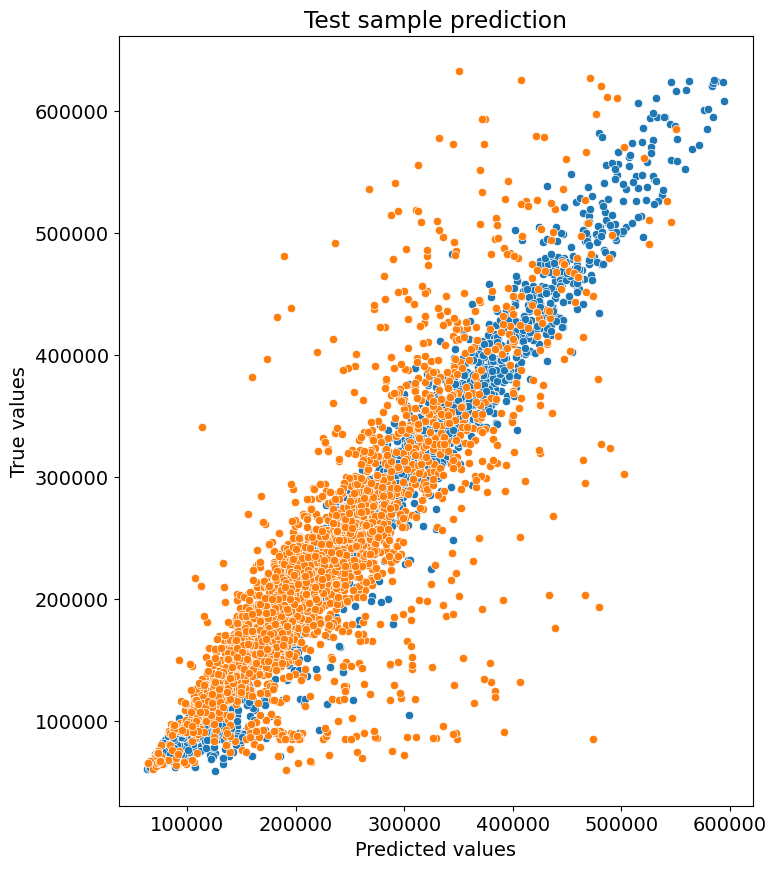

In [149]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(Y_train, y_train_preds, Y_test, y_test_preds)

## Cross-validation

In [150]:
cv_score = cross_val_score(rf_model, X_train, Y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.72806531, 0.74088568, 0.76777089])

In [151]:
cv_score.mean()

0.7455739609359723

## Важность признаков

In [152]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
27,MedPriceByDistrict,6.257357e-01
3,Square,1.163547e-01
4,LifeSquare,2.630765e-02
22,DistrictSize,2.371347e-02
7,HouseFloor,2.278092e-02
14,Social_3,1.985153e-02
0,Id,1.970293e-02
8,HouseYear,1.881901e-02
28,MedPriceByFloorYear,1.870361e-02
5,KitchenSquare,1.614578e-02


## Прогнозирование на тестовом датасете

In [153]:
test.shape

(5000, 29)

In [154]:
test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,HouseFloor_outlier,HouseYear_outlier,LifeSquare_nan,DistrictSize,new_district,IsDistrictLarge,floor_cat,year_cat,MedPriceByDistrict,MedPriceByFloorYear
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,0,0,0,106.0,0,1,2.0,2.0,162550.157311,192302.751941
1,15856,74,2.0,69.263183,63.263183,3.0,1,1.0,1977,0.075779,...,1,0,1,79.0,0,0,-1.0,2.0,240307.895031,178520.221429
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,...,0,0,0,3.0,0,0,0.0,-1.0,243250.623310,262279.813915
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,0,0,0,66.0,0,0,4.0,4.0,228796.542555,236097.181405
4,14275,27,1.0,47.527111,43.387569,3.0,17,17.0,2017,0.072158,...,0,0,0,578.0,0,1,4.0,5.0,117801.204933,223210.232592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,...,0,0,0,88.0,0,0,1.0,2.0,246508.486248,188059.595076
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,...,0,0,0,445.0,0,1,3.0,5.0,147390.425643,173374.299189
4997,5783,12,3.0,77.842178,48.282625,9.0,21,22.0,1989,0.090799,...,1,0,0,41.0,0,0,4.0,3.0,335781.706862,272140.199999
4998,4780,62,2.0,81.305222,75.305222,3.0,4,13.0,1977,0.072158,...,1,0,1,153.0,0,1,1.0,2.0,180325.766011,188059.595076


In [155]:
submit = pd.read_csv('sample_submission.csv')
submit.head()

,Id,Purchase
0,0,9
1,1,9
2,2,9
3,3,9
4,4,9


In [156]:
predictions = rf_model.predict(test)
predictions

array([151500.25878316, 205898.37835767, 231905.45146259, ...,
       331543.43493736, 200974.01114885, 156542.38162181])

In [157]:
submit['Price'] = predictions
submit.head()

ValueError: Length of values (5000) does not match length of index (20000)

In [158]:
submit.to_csv('rf_submit.csv', index=False)